<a href="https://colab.research.google.com/github/mehrdadkazemi254/DeepLearning/blob/main/DeepLearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

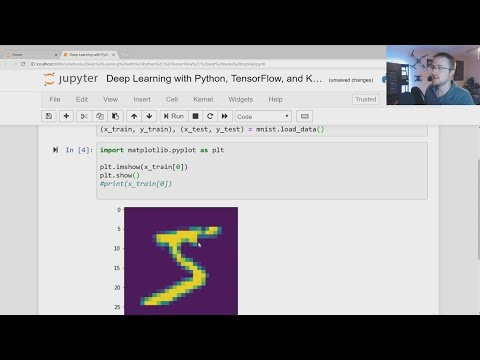

In [46]:
from IPython.display import YouTubeVideo
YouTubeVideo('wQ8BIBpya2k')

In [3]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [13]:
mnist = tf.keras.datasets.mnist #28*28 images of hand-written digits 0-9
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

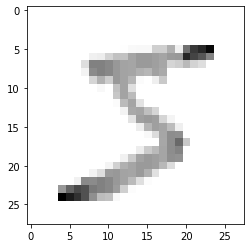

In [21]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap=plt.cm.binary)
# print(x_train[0])

In [33]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2611 - accuracy: 0.9244
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1037 - accuracy: 0.9682
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0717 - accuracy: 0.9774


In [35]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1156 - accuracy: 0.9640
0.115623340010643 0.9639999866485596


In [37]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [38]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [40]:
predictions = new_model.predict([x_test])
predictions

array([[1.22368036e-08, 3.34948709e-07, 2.25298231e-06, ...,
        9.99978065e-01, 1.03115646e-07, 8.60840316e-07],
       [2.62733715e-06, 7.75159970e-02, 9.22200441e-01, ...,
        1.00933585e-06, 1.07426229e-06, 9.75759384e-09],
       [5.04850135e-08, 9.99817550e-01, 1.71022407e-06, ...,
        1.50919121e-04, 2.36543729e-05, 1.19910425e-07],
       ...,
       [4.02802147e-09, 8.27518591e-07, 1.06874802e-08, ...,
        1.07811706e-04, 4.78917798e-07, 8.76397302e-04],
       [1.17703212e-06, 4.77675464e-08, 2.60440691e-09, ...,
        6.14156397e-06, 1.93335480e-04, 3.27737553e-08],
       [8.76792183e-06, 1.43756296e-08, 2.06235171e-07, ...,
        1.21314692e-09, 1.48099062e-07, 6.39530162e-09]], dtype=float32)

In [41]:
import numpy as np
np.argmax(predictions[0])

7

<function matplotlib.pyplot.show>

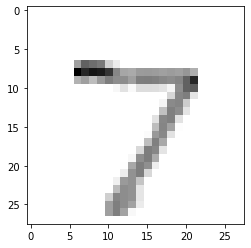

In [44]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show